#Classificação com a Rede Neural Convolucional

##Carregando Bibliotecas

Lista de Bibliotecas utilizadas:
 

*   **Pandas** - Permite trabalhar com Dataframe, utilizada para carregar os dados;
*   **Numpy** - Permite trabalhar com algumas operações matemática e com arrays;
*   **Matplotlib** - Permite gerar gráficos;
*   **Sklearn (Scikit-learn)** - Biblioteca que permite trabalhar com alguns algoritmos de aprendizado de máquina além de métricas, tais como acurácia e matriz de confusão;
*   **Keras** - Biblioteca específica para trabalhar com Deep Learning em python, utiliza por trás o Tensorflow;

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, fashion_mnist, cifar10 #Carrega as Bases de dados direto do Keras
from keras.models import Sequential, #Classe que permite criar o objeto que vai representar a Rede Neural
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten #Classe que permite criar as camadas da rede neural
from keras.optimizers import SGD #Classe que permite trabalhar com o Otmizador alterando seus hiperparâmetros
from keras.utils import to_categorical #Função que permite transformar as saídas de 0, 1, 2 para [0,0,0], [0,1,0], [0,0,1]

from sklearn.metrics import accuracy_score #Funções para calcular a acurácia do modelo

## Carregamento dos Dados

Os dados são carregados diretamente do Keras, pela função **load_data** nas variáveis  **X_train**, tendo **y_train** como saídas, e **X_test**, tendo **y_test** como saídas.

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Visuzalização das 10 primeiras imagens que compõe a base de treinamento

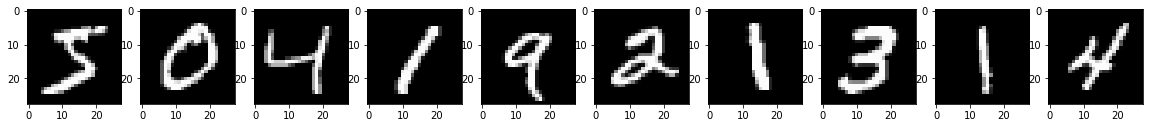

In [34]:
plt.rcParams['figure.figsize'] = (20,10)
fig, ax = plt.subplots(1,10)
for i in np.arange(10):
    ax[i].imshow(X_train[i,:])
plt.gray()
plt.show()

A entrada da rede neural terá 3 dimensões, (n, m, c), sendo **m** e **n** a resolução da imagem e **c** quantidade de canais, neste exemplo terá apenas 1 porque é uma imagem em preto e branco. Neste código, os dados são modificados pra a dimensão necessária para a rede neural.

In [35]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

## Criação do Modelo

Cria-se a variável **cnn**, que representa nosso modelo de rede neural, é adicionada uma camada de convolução, nas linhas 4 à 5. Adicionou-se a regularização Dropout entre a primeira camada de convolução e Flatten com 0,25, significa que aleaotiramente 25% das conexões serão eliminadas. O Flatten é conextado à primeira camada de densa, da parte totalmente conectada da rede, com 256 neurônios e Funçao Relu como ativação, e entre as duas, outro dropout de 0.5. Na Camada de saída (linha 14) adiconou-se 10 neurônios pois o problema possue 10 clases, e função de ativação softmax. Definiu-se o Gradiente Descendente Estocrástico como Otmizador, utilizando a biblioteca SGD, com taxa de aprendizado de 0.001 (**learning_rate**) que é padrão e a entropia cruzada como função custo (**categorical_crossentropy**). Definiu-se um total de 30 épocas (**epochs**) e um tamanho de lote (**batch_size**) de 500 amostras.

In [42]:
cnn = Sequential()

#Primeira Camada de Convolução
cnn.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=((28,28,1))))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

#Flatten dos Dados
cnn.add(Flatten())

#Rede Totalmente conectada
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

#montagem da Rede
cnn.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6272)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               1605888   
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

Treinou-se a CNN passando para ela os dados de treino **X_train** e **y_train**, sendo o **y_train** modificado pela função **to_categorical**, para que a saída seja comparada com distribuição de probabilidades. Utiliza-se ainda, o parâmetro validation_data, onde passamos os dados de teste **X_test** e **y_test** nos permitindo avaliar o desempenho da rede ainda durante o treinamento em termos de acurácia, tando nos dados de treino como de teste.

In [43]:
relatorio = cnn.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=30, 
                    batch_size=500,
                    validation_data=(X_test, to_categorical(y_test)))

Epoch 1/30
120/120 [==============================] - 2s 20ms/step - loss: 4.3772 - accuracy: 0.1671 - val_loss: 2.2384 - val_accuracy: 0.1870
Epoch 2/30
120/120 [==============================] - 2s 17ms/step - loss: 2.2020 - accuracy: 0.2196 - val_loss: 2.0228 - val_accuracy: 0.3851
Epoch 3/30
120/120 [==============================] - 2s 17ms/step - loss: 2.0467 - accuracy: 0.3275 - val_loss: 1.8773 - val_accuracy: 0.5259
Epoch 4/30
120/120 [==============================] - 2s 17ms/step - loss: 1.8834 - accuracy: 0.3826 - val_loss: 1.5741 - val_accuracy: 0.5206
Epoch 5/30
120/120 [==============================] - 2s 17ms/step - loss: 1.7133 - accuracy: 0.4359 - val_loss: 1.7514 - val_accuracy: 0.5823
Epoch 6/30
120/120 [==============================] - 2s 17ms/step - loss: 1.2083 - accuracy: 0.6254 - val_loss: 0.8057 - val_accuracy: 0.8314
Epoch 7/30
120/120 [==============================] - 2s 17ms/step - loss: 0.9054 - accuracy: 0.7218 - val_loss: 0.7591 - val_accuracy: 0.7948

##Avaliação da Rede

Visualização da evolução da acurácia da rede neural durante o treinamento. Sendo a linha azul o erro com a base de treino e a linha laranja o erro com a base de teste. Permitindo verificar que não está ocorrendo overfitting, pois tanto treino quanto teste evoluem de forma bem similar.

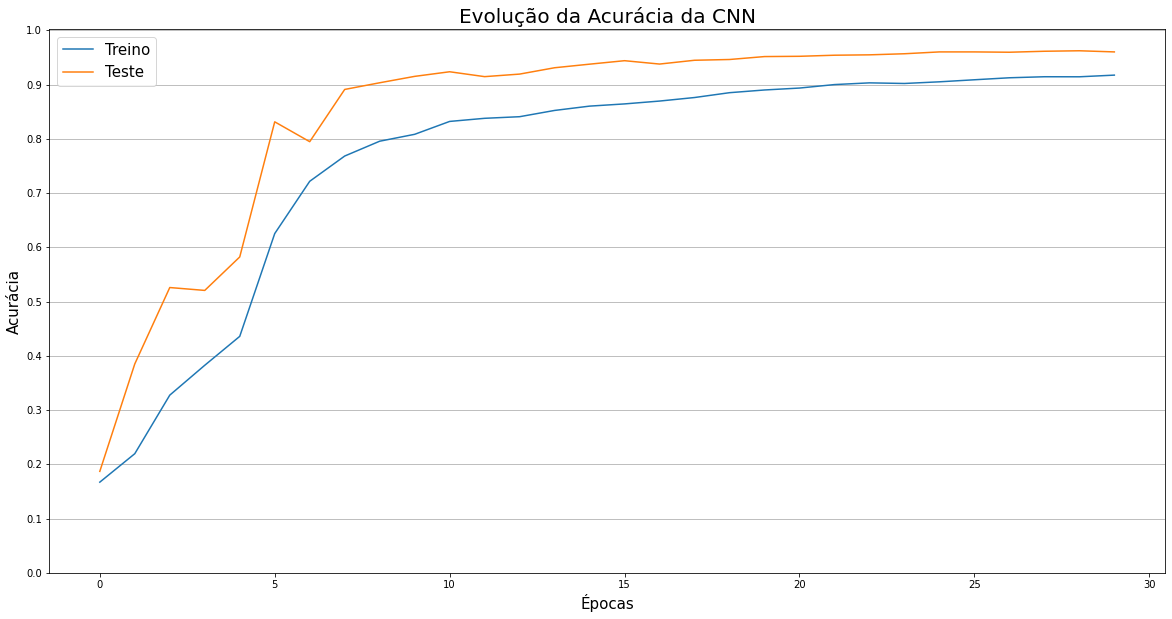

In [55]:
plt.plot(relatorio.epoch, relatorio.history['accuracy'], label='Treino')
plt.plot(relatorio.epoch, relatorio.history['val_accuracy'], label='Teste')
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Evolução da Acurácia da CNN', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y')
plt.show()

Visualização da evolução do Erro da rede neural durante o treinamento. Sendo a linha azul o erro com a base de treino e a linha laranja o erro com a base de teste. Permitindo verificar que não está ocorrendo overfitting, pois tanto treino quanto teste evoluem de forma bem similar.

In [51]:
np.max(relatorio.history['loss'])

4.377176761627197

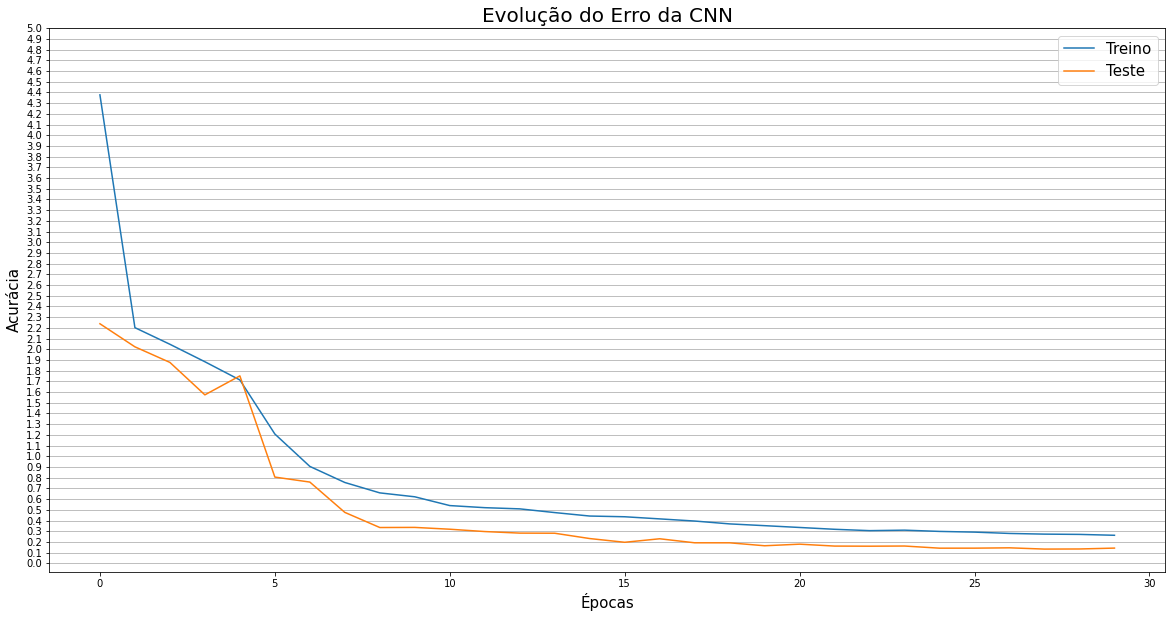

In [54]:
plt.plot(relatorio.epoch, relatorio.history['loss'], label='Treino')
plt.plot(relatorio.epoch, relatorio.history['val_loss'], label='Teste')
plt.yticks(np.arange(0,5.1,0.1))
plt.title('Evolução do Erro da CNN', fontsize=20)
plt.xlabel('Épocas', fontsize=15)
plt.ylabel('Acurácia', fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y')
plt.show()

Cálculo da acurácia, representada pela função **accuracy_score**, que recebe **y_test**, que são nossas saídas desejadas, e **y_pred**, que são as saídas preditas pela rede neural, utilizando a função **predict**. Utilizou-se a função **argmax** da biblioteca **numpy** para converter as saídas de distribuição de probabilidades para valores categóricos, que são as classes.

In [48]:
y_pred = np.argmax(cnn.predict(X_test), 1)
acuracia = accuracy_score(y_test, y_pred)
print('Acurácia: ', acuracia)

Acurácia:  0.9603
